<a href="https://colab.research.google.com/github/alura-es-cursos/Inmersion-en-Datos-con-Python/blob/aula01/credito_banco_aleman_inmersion_Dia1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INMERSIÓN DE DATOS CON PYTHON

#**PROBLEMA DE NEGOCIO**


---




La importancia de reducir el riesgo crediticio ha llevado a una institución financiera alemana a buscar soluciones innovadoras. Como científicos de datos, hemos sido convocados para construir un modelo de machine learning preciso y confiable que sea capaz de evaluar con mayor precisión la probabilidad de incumplimiento crediticio de sus clientes.

In [4]:
# prompt: importa los siguientes módulos con sus respectivos alias: pandas, matplotlib, seaborn, drive de google colab, warnings

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import warnings
import  numpy as np

#drive.mount("/content/Drive")
#warnings.filterwarnings("ignore")

In [5]:
pd.set_option('display.max_columns',None)
global df_banco, resultados

In [37]:
df_banco = pd.read_csv('german_credit.csv')
df_banco.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [7]:
df_banco.shape

(1000, 21)

In [7]:
df_banco.columns

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

In [13]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

In [38]:
#saca ls valores la correncia por cada valor en la columna
df_banco.account_check_status.value_counts()

no checking account                                   394
< 0 DM                                                274
0 <= ... < 200 DM                                     269
>= 200 DM / salary assignments for at least 1 year     63
Name: account_check_status, dtype: int64

In [39]:
#saca ls valores la correncia por cada valor en la columna
df_banco['account_check_status'].value_counts()

no checking account                                   394
< 0 DM                                                274
0 <= ... < 200 DM                                     269
>= 200 DM / salary assignments for at least 1 year     63
Name: account_check_status, dtype: int64

In [40]:
#saca ls valores unicos de la columna (account_check_status)
#df['columna'].value_counts().index es lo smismo que
#df.columna.value_counts().index.
df_banco['account_check_status'].value_counts().index


Index(['no checking account', '< 0 DM', '0 <= ... < 200 DM',
       '>= 200 DM / salary assignments for at least 1 year'],
      dtype='object')

In [41]:
df_banco.account_check_status.value_counts().index

Index(['no checking account', '< 0 DM', '0 <= ... < 200 DM',
       '>= 200 DM / salary assignments for at least 1 year'],
      dtype='object')

In [ ]:
#selecciona las columnas que son objetos y genera un iterable
columnas = list(df_banco.select_dtypes(include=['object']).columns)

# recorre el iterable - Es decir cada nombre de columna
# y por cada uno de ellas, genera las lista de valores unicos con .value_counts().index
for columna in columnas:
  print(f'El nombre de la columna: {columna}')
  print(list(df_banco[f'{columna}'].value_counts().index))
  print(list(df_banco[columna].value_counts().index))
  print('\n')

In [43]:
df_banco.foreign_worker

0      yes
1      yes
2      yes
3      yes
4      yes
      ... 
995    yes
996    yes
997    yes
998    yes
999    yes
Name: foreign_worker, Length: 1000, dtype: object

In [ ]:
# dic = {'yes':1,'no':0}
# df_banco['foreign_worker'] = df_banco['foreign_worker'].map(dic)
# df_banco['foreign_worker']

In [44]:
def procesar_datos():
  global df_banco
  df_banco = df_banco.drop_duplicates() if df_banco.duplicated().any()    else df_banco
  df_banco = df_banco.dropna()          if df_banco.isnull().values.any() else df_banco



# Mapeo  ###############################
  a = {'no checking account': 4,
      '>= 200 DM / salary assignments for at least 1 year': 3,
      '0 <= ... < 200 DM': 2,
      '< 0 DM': 1
  }
  df_banco['account_check_status'] = df_banco['account_check_status'].map(a)

# Mapeo  ###############################
  a = { 'no credits taken/ all credits paid back duly' : 1,
      'all credits at this bank paid back duly' : 2,
      'existing credits paid back duly till now' : 3,
      'delay in paying off in the past' : 4,
      'critical account/ other credits existing (not at this bank)' : 5
  }
  df_banco['credit_history'] = df_banco['credit_history'].map(a)

# Mapeo  ###############################
  a = {'car (new)' : 1,
      'car (used)' : 2,
      'furniture/equipment' : 3,
      'radio/television' : 4,
      'domestic appliances' : 5,
      'repairs' : 6,
      'education' : 7,
      '(vacation - does not exist?)' : 8,
      'retraining' : 9,
      'business' : 10,
      'others' : 11
  }
  df_banco['purpose'] = df_banco['purpose'].map(a)

# Mapeo  ###############################
  a = {'unknown/ no savings account' : 1,
      '.. >= 1000 DM ' : 2,
      '500 <= ... < 1000 DM ' : 3,
      '100 <= ... < 500 DM' : 4,
      '... < 100 DM' : 5
  }
  df_banco['savings'] = df_banco['savings'].map(a)


# Mapeo  ###############################
  a = {'.. >= 7 years' : 1,
      '4 <= ... < 7 years' : 2,
      '1 <= ... < 4 years' : 3,
      '... < 1 year ' : 4,
      'unemployed' : 5
  }
  df_banco['present_emp_since'] = df_banco['present_emp_since'].map(a)

# Mapeo  ###############################
  a = {'male : divorced/separated' : 1,
      'female : divorced/separated/married' : 2,
      'male : single' : 3,
      'male : married/widowed' : 4,
      'female : single' : 5
  }
  df_banco['personal_status_sex'] = df_banco['personal_status_sex'].map(a)

# Mapeo  ###############################
  a = {'none' : 1,
      'co-applicant' : 2,
      'guarantor' : 3
  }
  df_banco['other_debtors'] = df_banco['other_debtors'].map(a)

# Mapeo  ###############################
  a = {'real estate' : 1,
      'if not A121 : building society savings agreement/ life insurance' : 2,
      'if not A121/A122 : car or other, not in attribute 6' : 3,
      'unknown / no property' : 4
  }
  df_banco['property'] = df_banco['property'].map(a)

# Mapeo  ###############################
  a = {'bank' : 1,
      'stores' : 2,
      'none' : 3
  }
  df_banco['other_installment_plans'] = df_banco['other_installment_plans'].map(a)


# Mapeo  ###############################
  a = {'rent' : 1,
      'own' : 2,
      'for free' : 3
  }
  df_banco['housing'] = df_banco['housing'].map(a)

# Mapeo  ###############################
  a = {'unemployed/ unskilled - non-resident' : 1,
      'unskilled - resident' : 2,
      'skilled employee / official' : 3,
      'management/ self-employed/ highly qualified employee/ officer' : 4
  }
  df_banco['job'] = df_banco['job'].map(a)

# Mapeo  ###############################
  a = {'yes, registered under the customers name ' : 1,
      'none' : 0
  }
  df_banco['telephone'] = df_banco['telephone'].map(a)

# Mapeo  ###############################
  a = {'yes' : 1,
      'no' : 0
  }
  df_banco['foreign_worker'] = df_banco['foreign_worker'].map(a)

In [45]:
procesar_datos()
df_banco.sample(3)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
354,0,4,10,3,8,727,3,1,4,3,1,4,4,46,3,3,1,3,1,1,1
927,1,1,48,3,2,10297,5,2,4,3,1,4,4,39,2,3,3,3,2,1,1
126,0,1,12,3,5,701,5,3,4,4,1,2,1,40,3,2,1,2,1,0,1


In [46]:
variables_discretas = ['personal_status_sex','age',
                       'duration_in_month','credit_amount','default']
df_banco[variables_discretas].tail(3)

,personal_status_sex,age,duration_in_month,credit_amount,default
997,3,38,12,804,0
998,3,23,45,1845,1
999,3,27,45,4576,0


In [ ]:
# dic_sexo = {2:1,5:1,1:0,3:0,4:0}
# df_banco['sexo'] = df_banco['personal_status_sex'].map(dic_sexo)

In [ ]:
df_banco['age'].value_counts().sort_index()

# Graficar el diagrama de caja para la columna 'age'
plt.figure(figsize=(8,6))
plt.boxplot(df_banco['age'])
plt.title('Diagrama de Caja de Edad')
plt.ylabel('Edad')
plt.show()


In [ ]:
import numpy as np

# Calcular el rango intercuartílico (IQR)
Q1 = df_banco['age'].quantile(0.25)
Q3 = df_banco['age'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los outliers
outliers = df_banco[(df_banco['age'] < lower_bound) | (df_banco['age'] > upper_bound)]

pd.set_option('display.max_columns',None)
# Imprimir los outliers
print("Valores atípicos (outliers):")
print(outliers['age'])


In [49]:
def feature_engineering():
  global df_banco


#  male   : divorced/separated'         : 1,
#  female : divorced/separated/married' : 2,
#  male   : single'                     : 3,
#  male   : married/widowed'            : 4,
#  female : single'                     : 5
#  el mapeo lo llevo a dos valores en estado civil :
#     0 = soltero
#     1 = divociado/separado/casado
#  el mapeo lo llevo a dos valores en sexo :
#     1 = female
#     0 = male

  dic_est_civil = {3:1, 5:1, 1:0, 2:0, 4:0}
  dic_sexo = {2:1, 5:1, 1:0, 3:0, 4:0}
  df_banco['sexo']         = df_banco['personal_status_sex'].map(dic_sexo)
  df_banco['estado_civil'] = df_banco['personal_status_sex'].map(dic_est_civil)

  df_banco['rango_edad'] = pd.cut(x = df_banco['age'],
                                  bins=[18, 30, 40, 50, 60, 70, 80],
                                  labels = [1, 2, 3, 4, 5, 6]).astype(int)

  df_banco['rango_plazos_credito']=pd.cut(x = df_banco['duration_in_month'],
                                            bins=[1, 12, 24, 36, 48, 60, 72],
                                            labels = [1, 2, 3, 4, 5, 6]).astype(int)

  df_banco['rango_valor_credito']=pd.cut(x = df_banco['credit_amount'],
                                           bins=[1, 1000, 2000, 3000, 4000,
                                                 5000, 6000, 7000, 8000, 9000,
                                                 10000, 11000, 12000, 13000,
                                                 14000, 15000, 16000, 17000,
                                                 18000, 19000, 20000],
                                           labels = [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                     10, 11, 12, 13, 14, 15, 16,
                                                     17, 18, 19, 20]).astype(int)
  df_banco = df_banco.drop(columns=['personal_status_sex','age','duration_in_month','credit_amount'])

In [51]:
#feature_engineering()
df_banco.head()

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
0,0,1,5,5,1,1,4,1,4,1,3,2,2,3,1,1,1,0,1,5,1,2
1,1,2,3,5,5,3,2,1,2,1,3,2,1,3,1,0,1,1,0,1,4,6
2,0,4,5,8,5,2,2,1,3,1,3,2,1,2,2,0,1,0,1,3,1,3
3,0,1,3,4,5,2,2,3,4,2,3,3,1,3,2,0,1,0,1,3,4,8
4,1,1,4,1,5,3,3,1,4,4,3,3,2,3,2,0,1,0,1,4,2,5


In [52]:
df_banco.columns
df_banco['rango_edad'].value_counts()

#df_banco['account_check_status'].value_counts().index


1    411
2    315
3    161
4     68
5     39
6      6
Name: rango_edad, dtype: int64

In [53]:
df_banco['rango_plazos_credito'].value_counts()

2    411
1    359
3    143
4     71
5     15
6      1
Name: rango_plazos_credito, dtype: int64

In [57]:
df_banco['rango_valor_credito'].value_counts()

2     316
3     188
4     134
1     116
5      58
7      44
6      39
8      35
9      17
10     13
11     11
13      8
12      8
15      7
16      4
14      1
19      1
Name: rango_valor_credito, dtype: int64

In [58]:
df_banco.describe()

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,0.300000,2.577000,3.54500,4.277000,3.895000,2.616000,2.973000,1.145000,2.845000,2.358000,2.675000,1.929000,1.407000,2.904000,1.155000,0.404000,0.963000,0.310000,0.54800,2.027000,1.975000,3.766000
std,0.458487,1.257638,1.08312,2.739302,1.580023,1.208306,1.118715,0.477706,1.103718,1.050209,0.705601,0.531264,0.577654,0.653614,0.362086,0.490943,0.188856,0.462725,0.49794,1.136469,0.968149,2.821206
min,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,3.00000,2.000000,3.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.00000,1.000000,1.000000,2.000000
50%,0.000000,2.000000,3.00000,4.000000,5.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.00000,2.000000,2.000000,3.000000
75%,1.000000,4.000000,5.00000,5.000000,5.000000,3.000000,4.000000,1.000000,4.000000,3.000000,3.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.00000,3.000000,2.000000,4.000000
max,1.000000,4.000000,5.00000,10.000000,5.000000,5.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.00000,6.000000,6.000000,19.000000


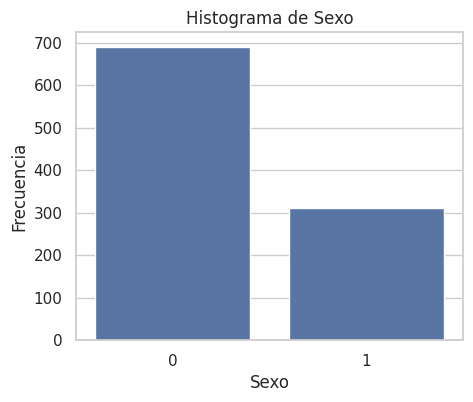

In [59]:
# Configurar el estilo de Seaborn (opcional)
sns.set(style="whitegrid")

# Crear el histograma utilizando Seaborn
plt.figure(figsize=(5, 4))
sns.countplot(data=df_banco, x ='sexo')
plt.title('Histograma de Sexo')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

In [60]:
def analisis_exploratorio():
  global df_banco
  histogramas = ['sexo','estado_civil','rango_plazos_credito','rango_edad','default','installment_as_income_perc']
  lista_histogramas = list(enumerate(histogramas))
  print(lista_histogramas)
  plt.figure(figsize = (30,20))
  plt.title('Histogramas')
  for i in lista_histogramas:
    plt.subplot(3, 2, i[0]+1)
    sns.countplot(x = i[1], hue='default', data = df_banco)
    plt.xlabel(i[1], fontsize=20)
    plt.ylabel('Total', fontsize=20)


[(0, 'sexo'), (1, 'estado_civil'), (2, 'rango_plazos_credito'), (3, 'rango_edad'), (4, 'default'), (5, 'installment_as_income_perc')]


<ipython-input-122-4ce11bc2afb6>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 2, i[0]+1)


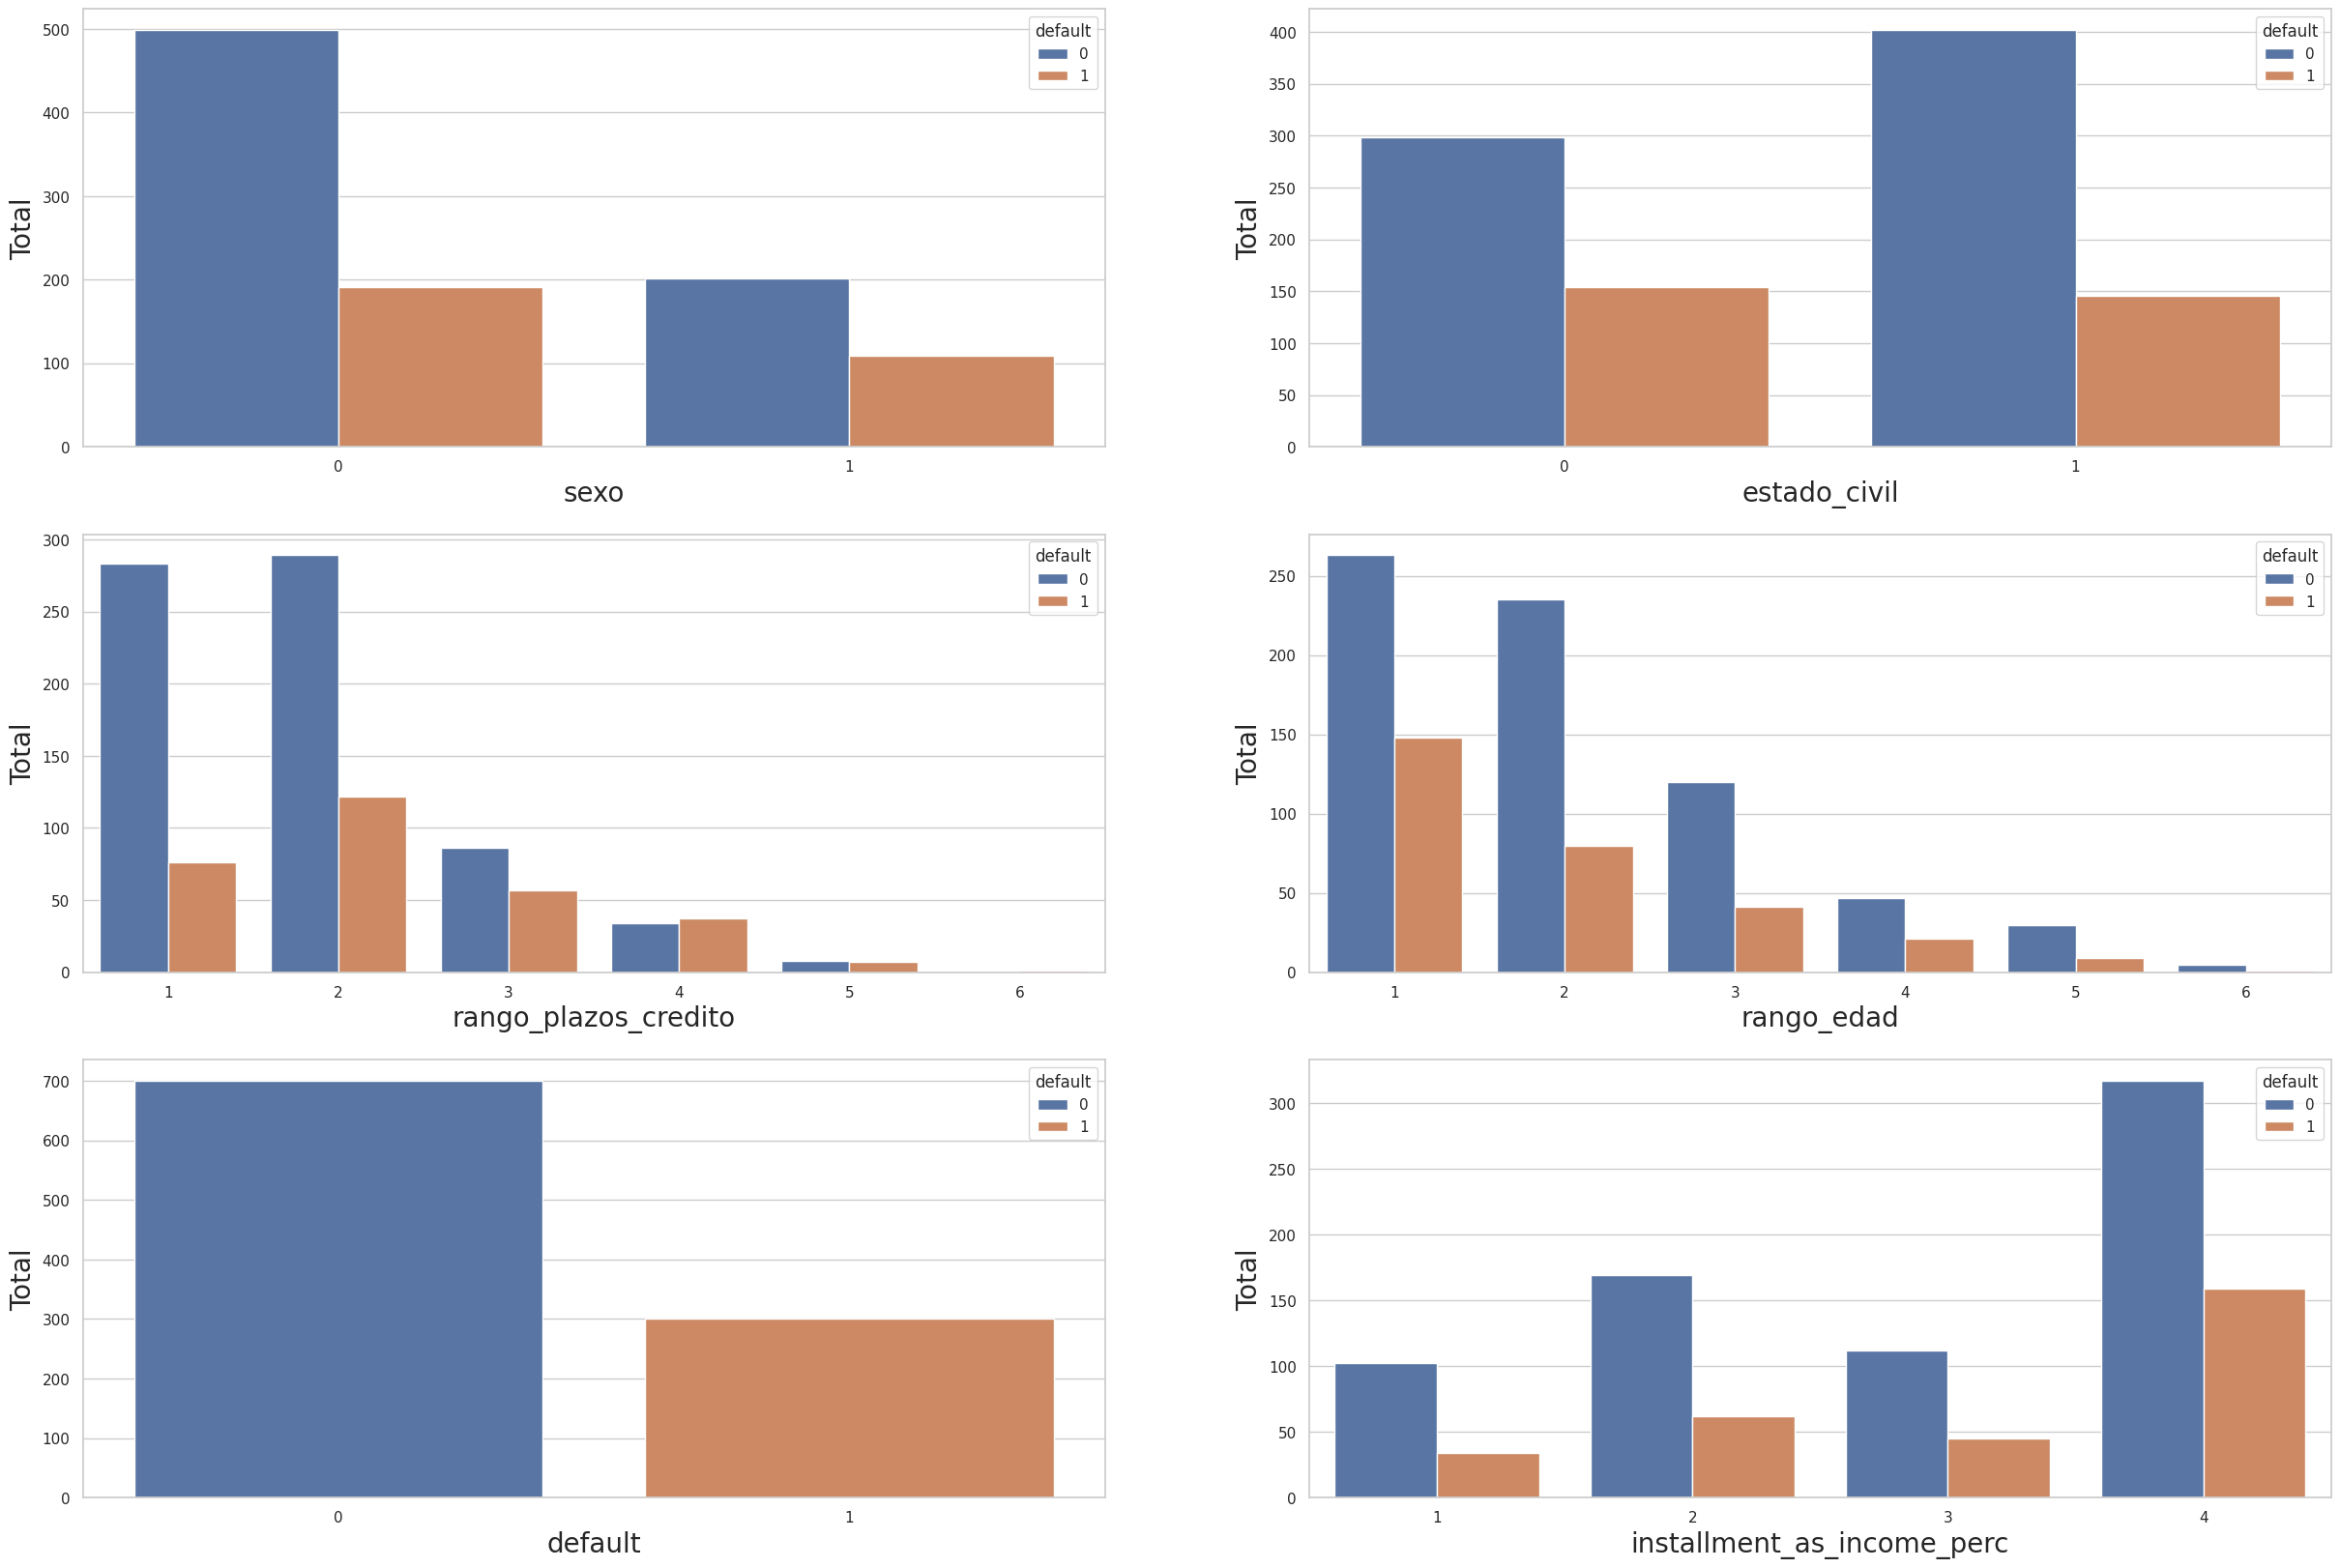

In [123]:
analisis_exploratorio()

## Desafíos

1. Analizar los datos de las distribuciones e identificar si hay algún valor o registros que no se deben considerar para el modelo.
2. Investigar qué es y como crear un mapa de calor para analizar la correlación de las variables.
3. Crear una conclusión para cada uno de los gráficos del histograma. Mirar los datos y extraer conclusiones, porque es una habilidad esencial.

In [61]:
df_banco

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
0,0,1,5,5,1,1,4,1,4,1,3,2,2,3,1,1,1,0,1,5,1,2
1,1,2,3,5,5,3,2,1,2,1,3,2,1,3,1,0,1,1,0,1,4,6
2,0,4,5,8,5,2,2,1,3,1,3,2,1,2,2,0,1,0,1,3,1,3
3,0,1,3,4,5,2,2,3,4,2,3,3,1,3,2,0,1,0,1,3,4,8
4,1,1,4,1,5,3,3,1,4,4,3,3,2,3,2,0,1,0,1,4,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,4,3,4,5,2,3,1,4,1,3,2,1,2,1,0,1,1,0,2,1,2
996,0,1,3,2,5,3,4,1,4,2,3,2,1,4,1,1,1,0,0,2,3,4
997,0,4,3,5,5,1,4,1,4,3,3,2,1,3,1,0,1,0,1,2,1,1
998,1,1,3,5,5,3,4,1,4,4,3,3,1,3,1,1,1,0,1,1,4,2
